# **1. Perkenalan Dataset**


**Nama:** Heart Disease Dataset
**Sumber:** UCI Machine Learning Repository
**Link Download:** https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/


## Deskripsi Dataset
Dataset ini digunakan untuk memprediksi potensi penyakit jantung berdasarkan berbagai parameter medis. Dataset terdiri dari fitur klinis seperti usia, jenis kelamin, tekanan darah, kolesterol, detak jantung maksimum, serta informasi tambahan terkait kondisi kesehatan jantung.


## Fitur-fitur:
1. **age** – usia pasien
2. **sex** – jenis kelamin (1 = pria, 0 = wanita)
3. **cp** – tipe nyeri dada (0–3)
4. **trestbps** – tekanan darah istirahat (mm Hg)
5. **chol** – kolesterol serum (mg/dl)
6. **fbs** – gula darah puasa (>120 mg/dl, 1 = ya)
7. **restecg** – hasil elektrokardiografi istirahat (0–2)
8. **thalach** – detak jantung maksimum yang dicapai
9. **exang** – angina akibat olahraga (1 = ya)
10. **oldpeak** – depresi ST dibandingkan kondisi istirahat
11. **slope** – kemiringan segmen ST (0–2)
12. **ca** – jumlah pembuluh darah yang diwarnai fluoroskopi (0–4)
13. **thal** – hasil tes thalassemia (1 = normal, 2 = fixed defect, 3 = reversible defect)


## Target:
- **target** – indikasi penyakit jantung (1 = ada, 0 = tidak)


## Tujuan:
Membangun model machine learning untuk memprediksi risiko penyakit jantung berdasarkan fitur klinis pasien.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from google.colab import drive

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Menghubungkan Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/heart.csv'

In [4]:
# Membaca Dataset
data = pd.read_csv(path)

# Menampilkan 5 baris pertama
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
# Mengecek Ukuran Dataset
print("Jumlah baris dan kolom:", data.shape)

Jumlah baris dan kolom: (303, 14)


In [6]:
# Mengecek Data Duplikat
duplicate_rows = data[data.duplicated()]

print("Jumlah data duplikat:", duplicate_rows.shape[0])

Jumlah data duplikat: 1


In [7]:
# Mengecek Missing Values
print("Jumlah missing values", data.isnull().sum())

Jumlah missing values age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [8]:
# Mengecek Struktur Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
display(data.describe(include='all'))


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
print(data['target'].value_counts().sort_index())

target
0    138
1    165
Name: count, dtype: int64


In [13]:
# Visualizations
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0, 0.5, 'Frequency')

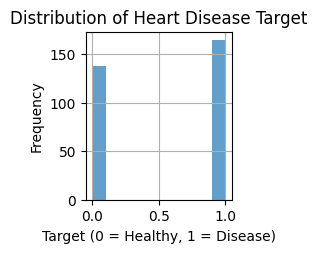

In [15]:
# Distribution of target (Heart Disease)
plt.subplot(2, 3, 1)
data['target'].hist(bins=10, alpha=0.7)
plt.title('Distribution of Heart Disease Target')
plt.xlabel('Target (0 = Healthy, 1 = Disease)')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Feature Correlation Heatmap')

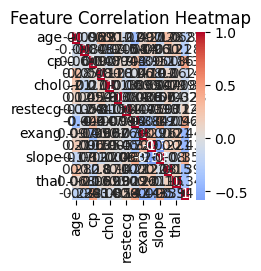

In [16]:
# Correlation heatmap
plt.subplot(2, 3, 2)
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')

Text(0, 0.5, 'Max Heart Rate (thalach)')

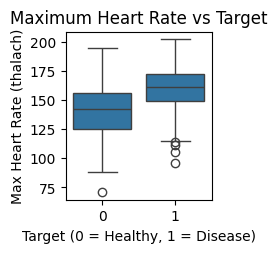

In [17]:
# Heart Rate vs Target
plt.subplot(2, 3, 3)
sns.boxplot(x='target', y='thalach', data=data)
plt.title('Maximum Heart Rate vs Target')
plt.xlabel('Target (0 = Healthy, 1 = Disease)')
plt.ylabel('Max Heart Rate (thalach)')

Text(0, 0.5, 'Frequency')

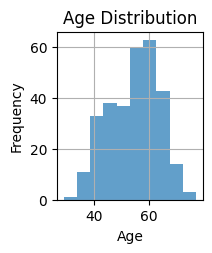

In [18]:
# Age distribution
plt.subplot(2, 3, 4)
data['age'].hist(alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')


Text(0, 0.5, 'Max Heart Rate')

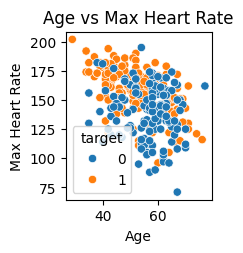

In [19]:
# Age vs Max Heart Rate
plt.subplot(2, 3, 5)
sns.scatterplot(x='age', y='thalach', hue='target', data=data)
plt.title('Age vs Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [20]:
# Create a copy for preprocessing
df_processed = data.copy()

In [21]:
# Check for missing values
print("Missing values before preprocessing:")
print(df_processed.isnull().sum())

Missing values before preprocessing:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [22]:
# Since wine quality dataset usually has no missing values, we'll handle if any
df_processed = df_processed.fillna(df_processed.median())

In [24]:
df_processed['target_category'] = df_processed['target'].apply(
    lambda x: 'disease' if x == 1 else 'healthy'
)


In [27]:
# Encode categorical target
le = LabelEncoder()
df_processed['target_label'] = le.fit_transform(df_processed['target_category'])

In [28]:
# Feature scaling for numerical features (Heart Dataset)
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

scaler = StandardScaler()
df_processed[numerical_features] = scaler.fit_transform(df_processed[numerical_features])


In [30]:
# Prepare features and target for ML (Heart Dataset)
X = df_processed[numerical_features]
y = df_processed['target_label']  # binary classification 0/1

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [31]:
print(f"Original data shape: {data.shape}")
print(f"Processed data shape: {df_processed.shape}")
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

print("\nTarget distribution in training:")
print(pd.Series(y_train).value_counts())

print("\nTarget distribution in test:")
print(pd.Series(y_test).value_counts())

Original data shape: (303, 14)
Processed data shape: (303, 16)
Training set: (242, 5)
Test set: (61, 5)

Target distribution in training:
target_label
0    132
1    110
Name: count, dtype: int64

Target distribution in test:
target_label
0    33
1    28
Name: count, dtype: int64


In [32]:
# Save processed data
df_processed.to_csv('heart_processed.csv', index=False)
print("\nProcessed data saved!")


Processed data saved!
